# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Read Solar Energy Production Dataset

In [2]:
data = pd.read_csv('F:\APU\FYP\Dataset\Cleaned_data\solar_production_dataset.csv')

data.head()

,Country,Date,Value,Daylight,Temperature,GHI,DNI
0,Australia,2023-03-01,4055.6634,734.69403,26.204160,894897.94,693884.56
1,Australia,2023-02-01,4466.4801,778.22370,27.318323,997130.10,756902.75
2,Australia,2023-01-01,4967.0119,812.18915,27.128540,1009778.60,739408.44
3,Australia,2022-12-01,5179.1465,822.62040,26.521873,1087540.60,817223.80
4,Australia,2022-11-01,4548.5315,801.65320,23.784800,1055200.00,791037.10


## Extract Data for each country

In [4]:
countries = data['Country'].unique()

solar_production_data = {}

# use loc() function to select data from a DataFrame based on specified row and column labels or conditions.
# Iterate over the countries
for country in countries:
    # Filter the data for the current country and 'solar' product
    country_energy_production = data.loc[
        (data['Country'] == country), ['Date', 'Value', 'Daylight', 'Temperature', 'GHI', 'DNI']
    ]
    
    # Store the filtered data in the dictionary
    solar_production_data[country] = country_energy_production.reset_index(drop=True)

solar_production_data['Canada']

,Date,Value,Daylight,Temperature,GHI,DNI
0,2023-03-01,942.6444,711.49990,-14.699362,448741.06,254522.810
1,2023-02-01,540.7314,559.20540,-22.037216,221882.42,121523.914
2,2023-01-01,290.1393,424.11322,-17.669130,91285.72,39892.754
3,2022-12-01,221.6010,372.75644,-18.011450,64273.56,25131.500
4,2022-11-01,349.7727,463.37842,-11.086453,104287.08,43819.234
...,...,...,...,...,...,...
154,2010-05-01,33.9870,1020.74280,2.854172,837849.10,453268.970
155,2010-04-01,24.1840,870.38336,-1.707509,679926.80,392374.000
156,2010-03-01,15.7240,712.32460,-10.063501,435876.56,249272.050
157,2010-02-01,6.6570,560.01996,-14.942983,207059.34,104362.810


# Resample to daily data

In [5]:
# hypro_production_data
for country_data in solar_production_data:
    
    # set time as the index
    solar_production_data[country_data]['Date'] = pd.to_datetime(solar_production_data[country_data]['Date'])
    solar_production_data[country_data].set_index('Date', inplace=True)
    
    # divide the monthly statistical production value by the number of days 
    # of the month to get the avarage daily production value
    solar_production_data[country_data]['Value'] = (solar_production_data[country_data]['Value']/
                                                    solar_production_data[country_data].index.days_in_month)
    
    # resample the monthly index to daily and impute the missing value with linear interpolate method
    daily_data = solar_production_data[country_data].resample('D').interpolate('linear')
    solar_production_data[country_data] = daily_data
    
solar_production_data['Canada']

,Value,Daylight,Temperature,GHI,DNI
Date,,,,,
2010-01-01,0.061226,424.713440,-18.478127,94387.070000,43452.105000
2010-01-02,0.066920,429.078166,-18.364090,98021.659355,45416.966452
2010-01-03,0.072614,433.442893,-18.250053,101656.248710,47381.827903
2010-01-04,0.078309,437.807619,-18.136016,105290.838065,49346.689355
2010-01-05,0.084003,442.172346,-18.021979,108925.427419,51311.550806
...,...,...,...,...,...
2023-02-25,28.822734,689.743543,-15.747627,416332.682857,235522.967714
2023-02-26,29.219022,695.182632,-15.485561,424434.777143,240272.928286
2023-02-27,29.615309,700.621721,-15.223494,432536.871429,245022.888857


# Model Building

### Split train and test data

In [6]:
data = solar_production_data['Canada']

# Split the data into training and testing sets
split_date = '2021-01-01'
train, test = data[:split_date], data[split_date:]

print(train.head())
print(train.shape)
print()
print(test.head())
print(test.shape)

               Value    Daylight  Temperature            GHI           DNI
Date                                                                      
2010-01-01  0.061226  424.713440   -18.478127   94387.070000  43452.105000
2010-01-02  0.066920  429.078166   -18.364090   98021.659355  45416.966452
2010-01-03  0.072614  433.442893   -18.250053  101656.248710  47381.827903
2010-01-04  0.078309  437.807619   -18.136016  105290.838065  49346.689355
2010-01-05  0.084003  442.172346   -18.021979  108925.427419  51311.550806
(4019, 5)

               Value    Daylight  Temperature            GHI           DNI
Date                                                                      
2021-01-01  6.234813  425.955100   -15.966349   94928.390000  42132.496000
2021-01-02  6.391924  430.332805   -16.120281   99127.011935  44735.254710
2021-01-03  6.549035  434.710509   -16.274212  103325.633871  47338.013419
2021-01-04  6.706146  439.088214   -16.428144  107524.255806  49940.772129
2021-01-05  6.

## Univariate Model - ARIMA - Daily

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#### The developer has use R with the auto.arima() function to identify the p, q, d value of the best fit ARIMA model for this dataset, the result shows that the order(p, q, d) = (1,1,1)(0,1,0)[365] 

#### Figure below show the result from R:
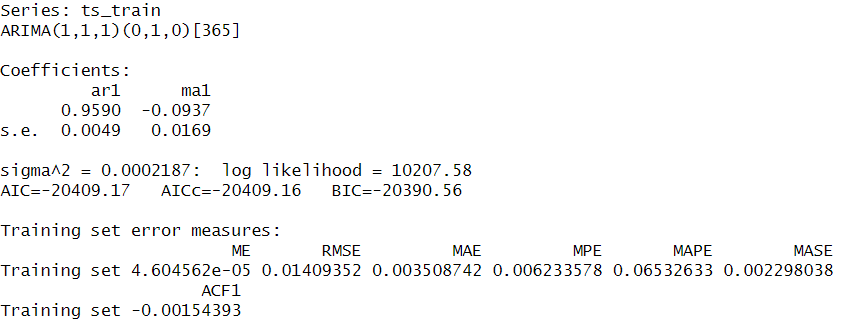

In [72]:
import rpy2.robjects as robjects
# Load the 'forecast' R package
robjects.r("library(forecast)")

# Load the ARIMA model
r_load = robjects.r['readRDS']
can_solar_arima_model = r_load(r"F:\APU\FYP\SEM 2\Report Doc\R script\can_solar_arima_model.rds")

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: This is forecast 8.21 
  Use suppressPackageStartupMessages() to eliminate package startup messages.

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package 'forecast' was built under R version 4.1.3 



In [73]:
# Generate predictions
r_forecast = robjects.r['forecast']
predictions = r_forecast(can_solar_arima_model, h=len(test))

# Evaluate the model performance
print("Mean Absolute Error: ", mean_absolute_error(predictions.rx('mean')[0], test['Value'].values))
mse = mean_squared_error(predictions.rx('mean')[0], test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", math.sqrt(mse))

Mean Absolute Error:  2.8054176777220268
Mean Squared Error:  10.761537583588566
Root Mean Squared Error:  3.2804782553140885


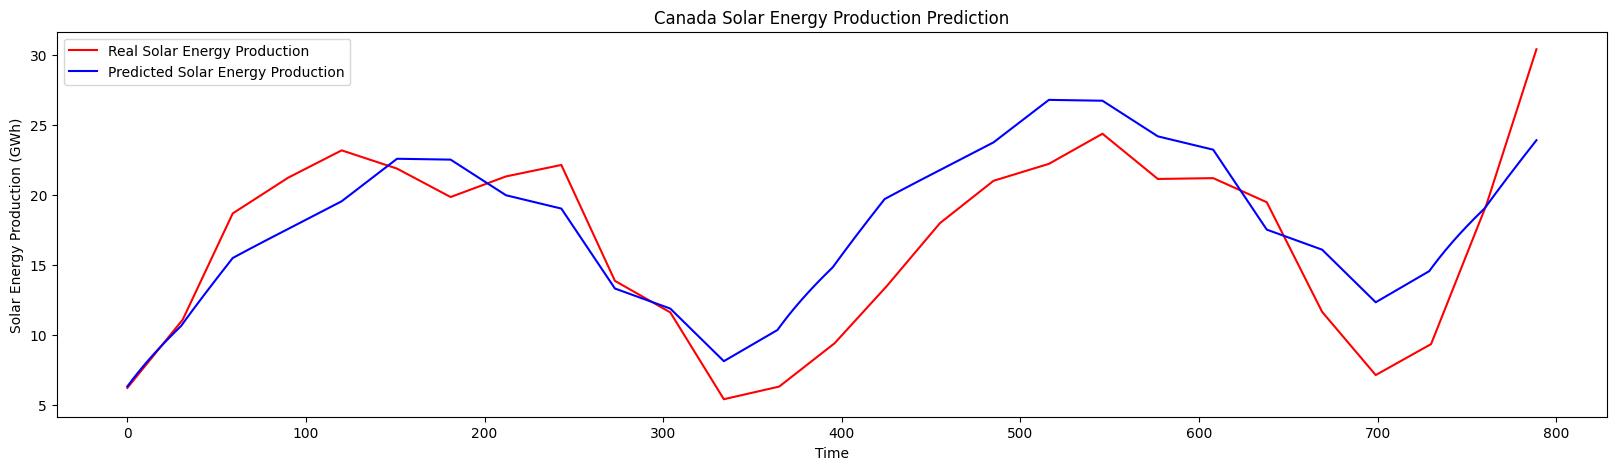

In [74]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(predictions.rx('mean')[0], color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('Canada Solar Energy Production Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy Production (GWh)')
plt.legend()
plt.show()

## SVM - Univariate

In [11]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [106]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['Value']].values)
test_scaled = scaler.transform(test[['Value']].values)

# Reshape the input data
time_steps = 365  # Define the number of previous time steps to consider

# Creating a data structure with 365 timestamps and 1 output
x_train = []
y_train = []
for i in range(time_steps, len(train)):
    x_train.append(train_scaled[i-time_steps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape, y_train.shape)

(3654, 365) (3654,)


In [107]:
# Build and Train the SVM Model
can_daily_svr = SVR(kernel='linear',gamma=0.5, C=0.1, epsilon = 0.01) # Specify hyperparameters
can_daily_svr.fit(x_train, y_train)

SVR(C=0.1, epsilon=0.01, gamma=0.5, kernel='linear')

In [108]:
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 365:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(time_steps, len(test)+time_steps):
    x_test.append(inputs[i-time_steps:i, 0])
x_test = np.array(x_test)

# Predict Solar Energy Production
svr_y_pred = can_daily_svr.predict(x_test).reshape(-1,1)
svr_y_pred = scaler.inverse_transform(svr_y_pred)
print(svr_y_pred.shape)

(790, 1)


In [109]:
print(inputs)

[[0.20983911]
 [0.21549694]
 [0.22115478]
 ...
 [1.61265099]
 [1.63427485]
 [1.65589871]]


In [110]:
# Evaluate the model
print("Mean Absolute Error: ", mean_absolute_error(svr_y_pred, test['Value'].values))
mse = mean_squared_error(svr_y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  0.19672478968306678
Mean Squared Error:  0.07785578876774507
Root Mean Squared Error:  0.279026501909308


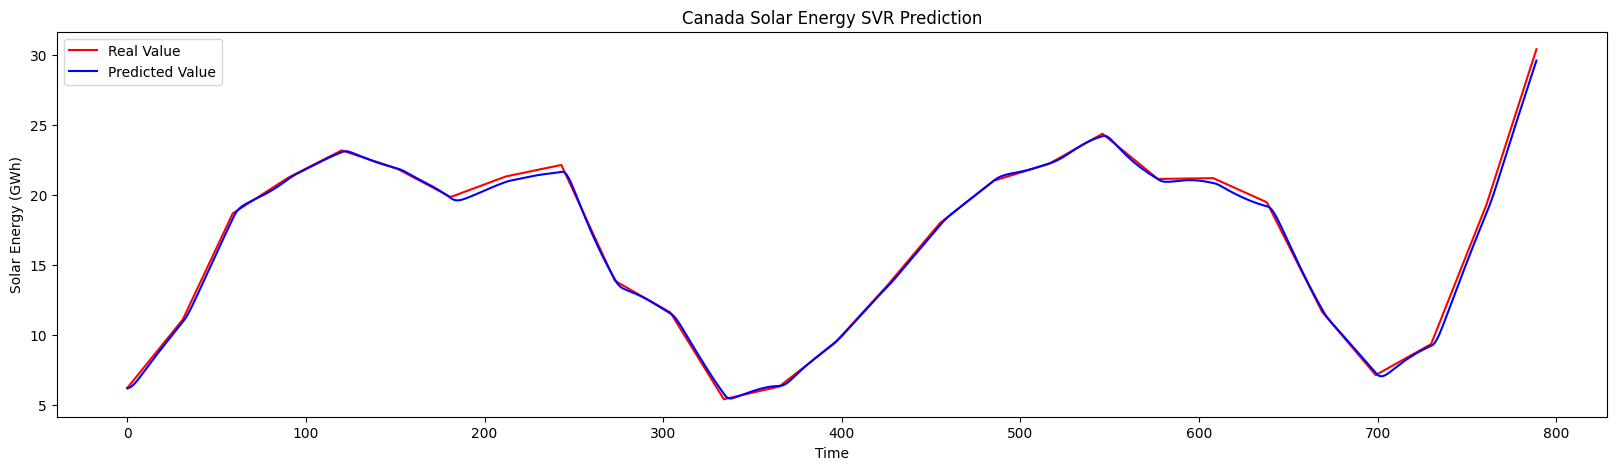

In [111]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color='red', label='Real Value')
plt.plot(svr_y_pred, color='blue', label='Predicted Value')
plt.title('Canada Solar Energy SVR Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Univariate GRU - Daily

In [81]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train[['Value']].values)

In [82]:
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Set the number of time steps (input sequence length)
time_steps = 365

# Create the training datasets
X_train, y_train = create_dataset(training_set_scaled, time_steps)

# Create the testing datasets
X_test, y_test = create_dataset(test['Value'].values, time_steps)

In [20]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Create the model
can_daily_gru = Sequential()
can_daily_gru.add(GRU(units=64, return_sequences=True, input_shape=(time_steps, 1)))
can_daily_gru.add(GRU(units=64))
can_daily_gru.add(Dense(1, activation='linear'))

can_daily_gru.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
can_daily_gru.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
115/115 [==============================] - 79s 385ms/step - loss: 0.0131
Epoch 2/100
115/115 [==============================] - 53s 461ms/step - loss: 1.5783e-04
Epoch 3/100
115/115 [==============================] - 55s 474ms/step - loss: 1.1473e-04
Epoch 4/100
115/115 [==============================] - 55s 474ms/step - loss: 9.1258e-05
Epoch 5/100
115/115 [==============================] - 51s 440ms/step - loss: 6.9144e-05
Epoch 6/100
115/115 [==============================] - 45s 390ms/step - loss: 5.1488e-05
Epoch 7/100
115/115 [==============================] - 45s 395ms/step - loss: 3.1104e-05
Epoch 8/100
115/115 [==============================] - 47s 406ms/step - loss: 1.8602e-05
Epoch 9/100
115/115 [==============================] - 46s 397ms/step - loss: 1.3944e-05
Epoch 10/100
115/115 [==============================] - 46s 399ms/step - loss: 1.2452e-05
Epoch 11/100
115/115 [==============================] - 55s 473ms/step - loss: 1.1965e-05
Epoch 12/100
115/115 [=

115/115 [==============================] - 36s 316ms/step - loss: 2.4910e-06
Epoch 93/100
115/115 [==============================] - 37s 325ms/step - loss: 1.8496e-06
Epoch 94/100
115/115 [==============================] - 35s 308ms/step - loss: 5.2535e-06
Epoch 95/100
115/115 [==============================] - 36s 309ms/step - loss: 8.2531e-06
Epoch 96/100
115/115 [==============================] - 37s 319ms/step - loss: 2.3089e-05
Epoch 97/100
115/115 [==============================] - 35s 305ms/step - loss: 7.9865e-06
Epoch 98/100
115/115 [==============================] - 34s 295ms/step - loss: 2.0937e-06
Epoch 99/100
115/115 [==============================] - 37s 318ms/step - loss: 4.5496e-06
Epoch 100/100
115/115 [==============================] - 35s 307ms/step - loss: 2.1643e-06


In [83]:
# Getting the predicted value
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 365:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(time_steps, len(test)+time_steps):
    X_test.append(inputs[i-time_steps:i, 0])
X_test = np.array(X_test)

gru_y_pred = can_daily_gru.predict(X_test)
gru_y_pred = sc.inverse_transform(gru_y_pred)

25/25 [==============================] - 35s 292ms/step


In [84]:
print("Mean Absolute Error: ", mean_absolute_error(gru_y_pred, test['Value'].values))
mse = mean_squared_error(gru_y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  0.0773441989623866
Mean Squared Error:  0.008828904934056381
Root Mean Squared Error:  0.09396225270850195


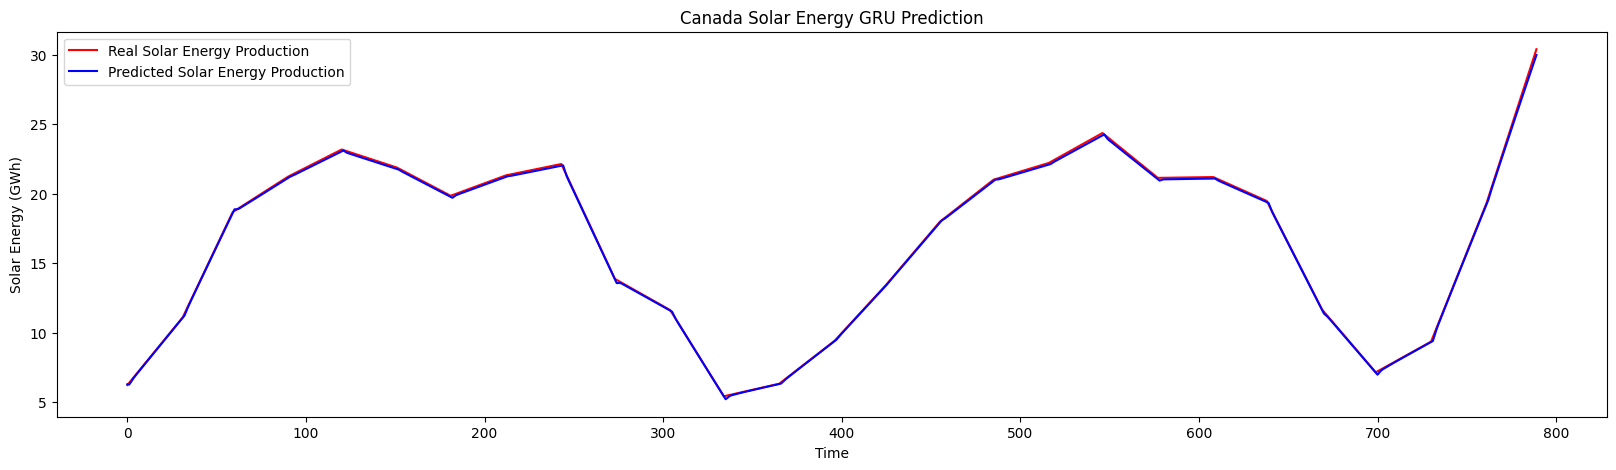

In [85]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(gru_y_pred, color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('Canada Solar Energy GRU Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Univariate LSTM - Daily

In [86]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train[['Value']].values)

print(training_set_scaled)
print(training_set_scaled.shape)

[[0.00000000e+00]
 [3.10717304e-04]
 [6.21434607e-04]
 ...
 [3.28776967e-01]
 [3.32822762e-01]
 [3.36868557e-01]]
(4019, 1)


In [87]:
# Creating a data structure with 365 timestamps and 1 output
X_train = []
y_train = []
for i in range(time_steps, len(train)):
    X_train.append(training_set_scaled[i-time_steps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [88]:
print(X_train)
X_train.shape

[[0.00000000e+00 3.10717304e-04 6.21434607e-04 ... 9.62941158e-03
  9.63196670e-03 9.63452183e-03]
 [3.10717304e-04 6.21434607e-04 9.32151911e-04 ... 9.63196670e-03
  9.63452183e-03 9.63707695e-03]
 [6.21434607e-04 9.32151911e-04 1.24286921e-03 ... 9.63452183e-03
  9.63707695e-03 1.03096931e-02]
 ...
 [1.98561067e-01 1.98523433e-01 2.04181269e-01 ... 3.16639582e-01
  3.20685377e-01 3.24731172e-01]
 [1.98523433e-01 2.04181269e-01 2.09839105e-01 ... 3.20685377e-01
  3.24731172e-01 3.28776967e-01]
 [2.04181269e-01 2.09839105e-01 2.15496941e-01 ... 3.24731172e-01
  3.28776967e-01 3.32822762e-01]]


(3654, 365)

In [89]:
print(y_train)
y_train.shape

[0.00963708 0.01030969 0.01098231 ... 0.32877697 0.33282276 0.33686856]


(3654,)

In [90]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [52]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [53]:
# Initialising the RNN
can_daily_uni_lstm = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
can_daily_uni_lstm.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
can_daily_uni_lstm.add(Dropout(0.2))

can_daily_uni_lstm.add(LSTM(units = 64, return_sequences = True))
can_daily_uni_lstm.add(Dropout(0.2))

can_daily_uni_lstm.add(LSTM(units = 64))
can_daily_uni_lstm.add(Dropout(0.2))

# Adding the output layer
can_daily_uni_lstm.add(Dense(units = 1))

In [54]:
# Compiling the RNN
can_daily_uni_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
can_daily_uni_lstm.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
115/115 [==============================] - 208s 1s/step - loss: 0.0131
Epoch 2/100
115/115 [==============================] - 119s 1s/step - loss: 0.0031
Epoch 3/100
115/115 [==============================] - 121s 1s/step - loss: 0.0022
Epoch 4/100
115/115 [==============================] - 126s 1s/step - loss: 0.0019
Epoch 5/100
115/115 [==============================] - 138s 1s/step - loss: 0.0018
Epoch 6/100
115/115 [==============================] - 135s 1s/step - loss: 0.0017
Epoch 7/100
115/115 [==============================] - 142s 1s/step - loss: 0.0015
Epoch 8/100
115/115 [==============================] - 147s 1s/step - loss: 0.0013
Epoch 9/100
115/115 [==============================] - 142s 1s/step - loss: 0.0013
Epoch 10/100
115/115 [==============================] - 138s 1s/step - loss: 0.0014
Epoch 11/100
115/115 [==============================] - 123s 1s/step - loss: 0.0013
Epoch 12/100
115/115 [==============================] - 121s 1s/step - loss: 0.0011
E

115/115 [==============================] - 100s 869ms/step - loss: 4.7199e-04
Epoch 95/100
115/115 [==============================] - 96s 838ms/step - loss: 4.8094e-04
Epoch 96/100
115/115 [==============================] - 98s 850ms/step - loss: 4.3043e-04
Epoch 97/100
115/115 [==============================] - 95s 830ms/step - loss: 4.4580e-04
Epoch 98/100
115/115 [==============================] - 93s 807ms/step - loss: 4.9098e-04
Epoch 99/100
115/115 [==============================] - 99s 865ms/step - loss: 4.9157e-04
Epoch 100/100
115/115 [==============================] - 100s 867ms/step - loss: 4.8990e-04


In [55]:
test[['Value']].shape

(790, 1)

In [91]:
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 365:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(time_steps, len(test)+time_steps):
    X_test.append(inputs[i-time_steps:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
uni_lstm_y_pred = can_daily_uni_lstm.predict(X_test)
uni_lstm_y_pred = sc.inverse_transform(uni_lstm_y_pred)

25/25 [==============================] - 21s 169ms/step


In [92]:
print("Mean Absolute Error: ", mean_absolute_error(uni_lstm_y_pred, test['Value'].values))
mse = mean_squared_error(uni_lstm_y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  2.130716708623857
Mean Squared Error:  13.764096358941831
Root Mean Squared Error:  3.7099995092913196


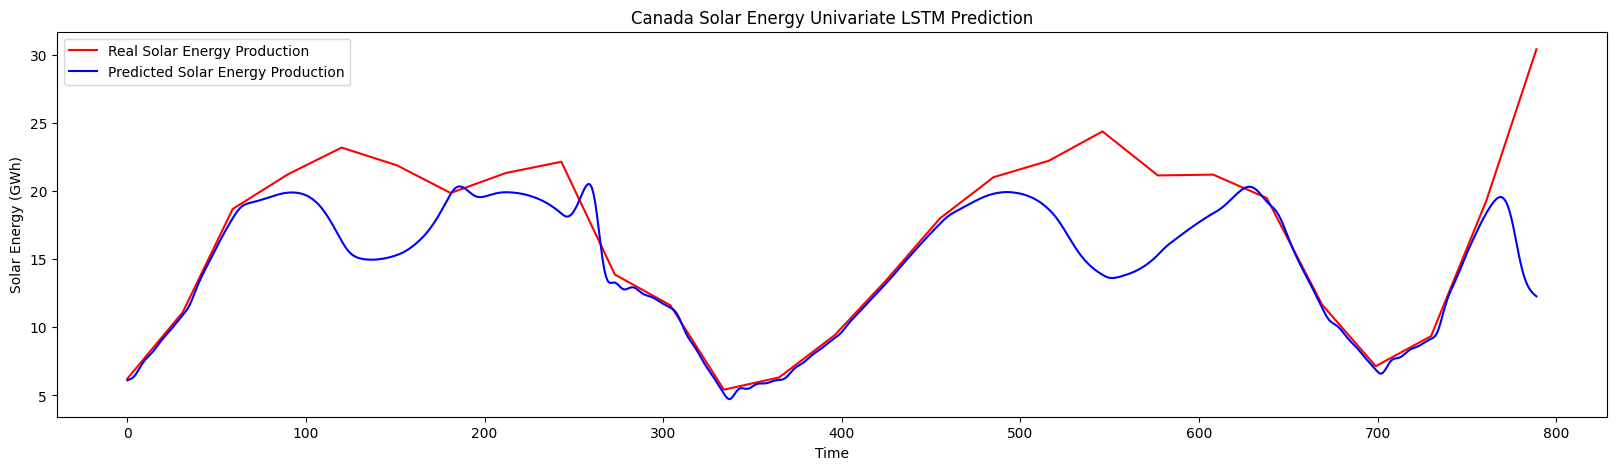

In [93]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(uni_lstm_y_pred, color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('Canada Solar Energy Univariate LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Multivariate LSTM

In [94]:
data = solar_production_data['Canada']

data.shape

(4808, 5)

In [95]:
X = data[['Daylight', 'Temperature', 'GHI', 'DNI', 'Value']]
y = data[['Value']]

X.head()

,Daylight,Temperature,GHI,DNI,Value
Date,,,,,
2010-01-01,424.713440,-18.478127,94387.070000,43452.105000,0.061226
2010-01-02,429.078166,-18.364090,98021.659355,45416.966452,0.066920
2010-01-03,433.442893,-18.250053,101656.248710,47381.827903,0.072614
2010-01-04,437.807619,-18.136016,105290.838065,49346.689355,0.078309
2010-01-05,442.172346,-18.021979,108925.427419,51311.550806,0.084003


In [96]:
# Split the data into training and testing sets
split_date = '2021-01-01'
X_train, X_test = X[:split_date], X[split_date:]
y_train, y_test = y[:split_date], y[split_date:]

In [97]:
# Scale the features and target variables using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))
X_train, X_test = X_scaler.fit_transform(X_train), X_scaler.transform(X_test)
y_train, y_test = y_scaler.fit_transform(y_train), y_scaler.transform(y_test)

In [98]:
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(4019, 5)
(790, 5)

(4019, 1)
(790, 1)


In [99]:
# Reshape the input data to fit the LSTM model (samples, time steps, features)
time_steps = 365  # Define the number of previous time steps to consider
n_features = X_train.shape[1]  # Number of features

# Creating a data structure with 365 timestamps and 1 output
X_train1 = []
y_train1 = []
for i in range(time_steps, len(X_train)):
    X_train1.append(X_train[i-time_steps:i])
    y_train1.append(y_train[i][0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

print(X_train1.shape)

(3654, 365, 5)


In [100]:
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], X_train1.shape[2]))

In [66]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

can_daily_multi_lstm = Sequential()
can_daily_multi_lstm.add(LSTM(units = 64, return_sequences = True, input_shape=(time_steps, n_features)))
can_daily_multi_lstm.add(Dropout(0.2))
can_daily_multi_lstm.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
can_daily_multi_lstm.add(Dropout(0.2))
can_daily_multi_lstm.add(LSTM(units = 64))
can_daily_multi_lstm.add(Dropout(0.2))
can_daily_multi_lstm.add(Dense(1))

In [67]:
can_daily_multi_lstm.compile(optimizer='adam', loss='mean_squared_error')

can_daily_multi_lstm.fit(X_train1, y_train1, epochs=100, batch_size=32)

Epoch 1/100
115/115 [==============================] - 184s 464ms/step - loss: 0.0135
Epoch 2/100
115/115 [==============================] - 61s 530ms/step - loss: 0.0029
Epoch 3/100
115/115 [==============================] - 73s 632ms/step - loss: 0.0025
Epoch 4/100
115/115 [==============================] - 83s 725ms/step - loss: 0.0022
Epoch 5/100
115/115 [==============================] - 78s 681ms/step - loss: 0.0021
Epoch 6/100
115/115 [==============================] - 73s 633ms/step - loss: 0.0020
Epoch 7/100
115/115 [==============================] - 75s 655ms/step - loss: 0.0017
Epoch 8/100
115/115 [==============================] - 76s 663ms/step - loss: 0.0016
Epoch 9/100
115/115 [==============================] - 69s 596ms/step - loss: 0.0016
Epoch 10/100
115/115 [==============================] - 74s 646ms/step - loss: 0.0016
Epoch 11/100
115/115 [==============================] - 74s 647ms/step - loss: 0.0013
Epoch 12/100
115/115 [==============================] - 80s 69

115/115 [==============================] - 121s 1s/step - loss: 6.8392e-04
Epoch 94/100
115/115 [==============================] - 123s 1s/step - loss: 6.0034e-04
Epoch 95/100
115/115 [==============================] - 117s 1s/step - loss: 5.0890e-04
Epoch 96/100
115/115 [==============================] - 123s 1s/step - loss: 5.4280e-04
Epoch 97/100
115/115 [==============================] - 123s 1s/step - loss: 4.8646e-04
Epoch 98/100
115/115 [==============================] - 125s 1s/step - loss: 5.2790e-04
Epoch 99/100
115/115 [==============================] - 118s 1s/step - loss: 4.7252e-04
Epoch 100/100
115/115 [==============================] - 102s 891ms/step - loss: 5.0042e-04


In [101]:
X_total_data = X
inputs = X_total_data[len(X_total_data) - len(X_test) - 365:]
inputs = X_scaler.transform(inputs)
print(inputs.shape)
len(X_test)
X_test1 = []
for i in range(time_steps, len(X_test)+time_steps):
    X_test1.append(inputs[i-time_steps:i])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], X_test1.shape[2]))

multi_lstm_y_pred = can_daily_multi_lstm.predict(X_test1)
multi_lstm_y_pred = y_scaler.inverse_transform(multi_lstm_y_pred)
real_value = y_scaler.inverse_transform(y_test)
hist_value = y_scaler.inverse_transform(y_train)
multi_lstm_y_pred

(1155, 5)
25/25 [==============================] - 22s 150ms/step


array([[ 6.045788 ],
       [ 6.146297 ],
       [ 6.258708 ],
       [ 6.3882246],
       [ 6.5403037],
       [ 6.715464 ],
       [ 6.9109645],
       [ 7.121462 ],
       [ 7.3367267],
       [ 7.54587  ],
       [ 7.7410398],
       [ 7.9185896],
       [ 8.079046 ],
       [ 8.226291 ],
       [ 8.365744 ],
       [ 8.502429 ],
       [ 8.639775 ],
       [ 8.780627 ],
       [ 8.925602 ],
       [ 9.073314 ],
       [ 9.221871 ],
       [ 9.368714 ],
       [ 9.5113945],
       [ 9.648511 ],
       [ 9.780092 ],
       [ 9.907526 ],
       [10.033129 ],
       [10.159532 ],
       [10.2890415],
       [10.423242 ],
       [10.562765 ],
       [10.707147 ],
       [10.854831 ],
       [11.013768 ],
       [11.193655 ],
       [11.400797 ],
       [11.634985 ],
       [11.890396 ],
       [12.157702 ],
       [12.426739 ],
       [12.688924 ],
       [12.9388275],
       [13.1747265],
       [13.398211 ],
       [13.613156 ],
       [13.824405 ],
       [14.036461 ],
       [14.25

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error: ", mean_absolute_error(multi_lstm_y_pred, real_value))
mse = mean_squared_error(multi_lstm_y_pred, real_value)
print("Mean Squared Error: ", mse)
import math
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  1.8349402134258568
Mean Squared Error:  6.214282684762422
Root Mean Squared Error:  2.492846301873106


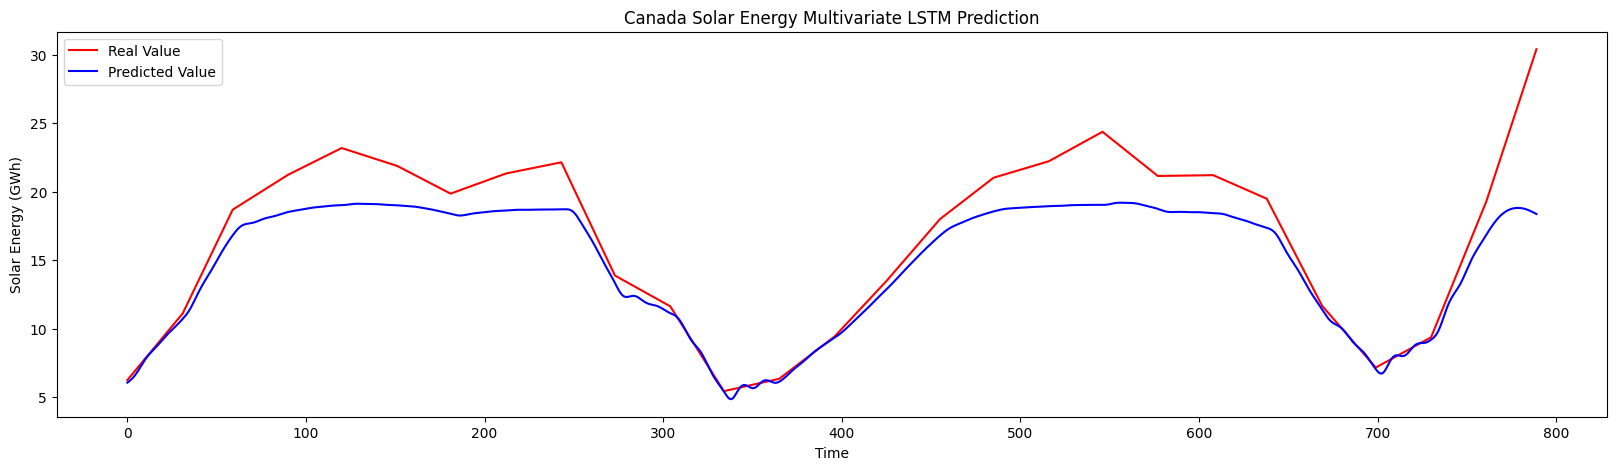

In [103]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(real_value, color='red', label='Real Value')
plt.plot(multi_lstm_y_pred, color='blue', label='Predicted Value')
plt.title('Canada Solar Energy Multivariate LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

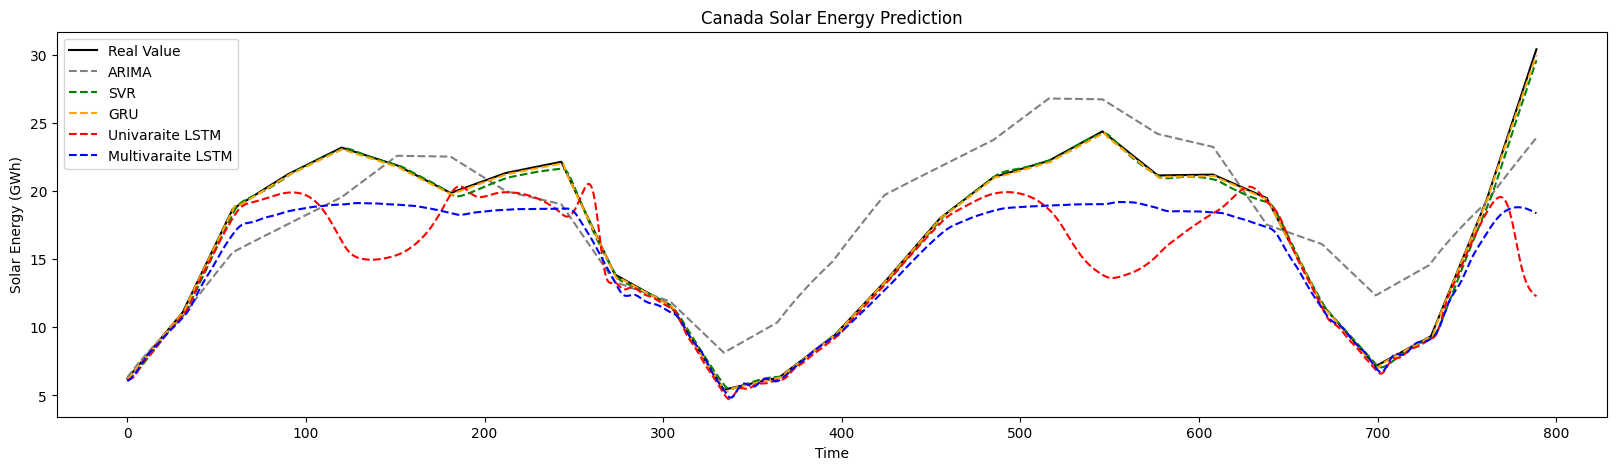

In [112]:
# Overview

# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(real_value, color='black', label='Real Value')
plt.plot(predictions.rx('mean')[0], color='grey', linestyle='--', label='ARIMA')
plt.plot(svr_y_pred, color='green', linestyle='--', label='SVR')
plt.plot(gru_y_pred, color='orange', linestyle='--', label='GRU')
plt.plot(uni_lstm_y_pred, color='red', linestyle='--', label='Univaraite LSTM')
plt.plot(multi_lstm_y_pred, color='blue', linestyle='--', label='Multivaraite LSTM')
plt.title('Canada Solar Energy Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

# Save Best Model

In [71]:
can_daily_gru.save("can_solar_best_gru.h5")

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
